In [246]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [247]:
df = pd.read_excel("ML Assessment Dataset (Bank Data).xlsx")

In [248]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
176,44,admin.,married,secondary,no,5181,yes,yes,cellular,31,jul,18,7,-1,0,unknown,no
3766,38,technician,single,secondary,no,311,yes,no,cellular,28,may,61,2,-1,0,unknown,no
4409,57,retired,married,secondary,no,107,no,no,cellular,14,jul,85,2,-1,0,unknown,no
1321,40,services,married,secondary,no,17,no,no,cellular,4,jun,78,1,-1,0,unknown,no
4470,31,technician,single,tertiary,no,1166,yes,no,unknown,3,jun,207,1,-1,0,unknown,no


# EDA

## Basic Data Exploration

In [249]:
# describe of numerical features
print(df.describe())

               age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000  


In [250]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [252]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Text(0.5, 1.0, 'Target distribution')

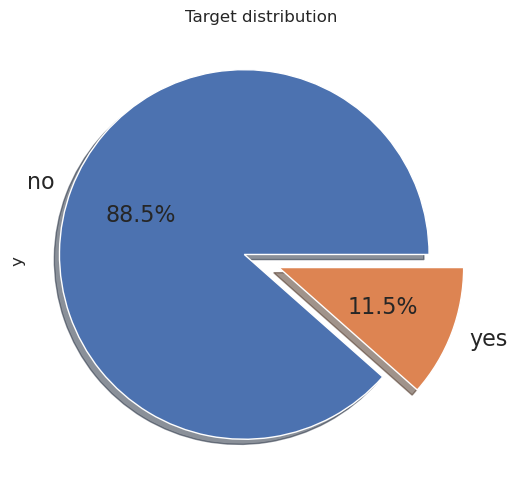

In [253]:
# Plotting target distribution 
plt.figure(figsize=(6,6))
df['y'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Target distribution")

The distribution of the target variable is a significant class imbalance. Approximately 88.5% of the instances fall into the "No" category, while only 11.5% belong to the "Yes" category. This imbalance might lead to a bias towards the majority class and fall the ability to correctly predict the minority class. 

### Univariate Analysis

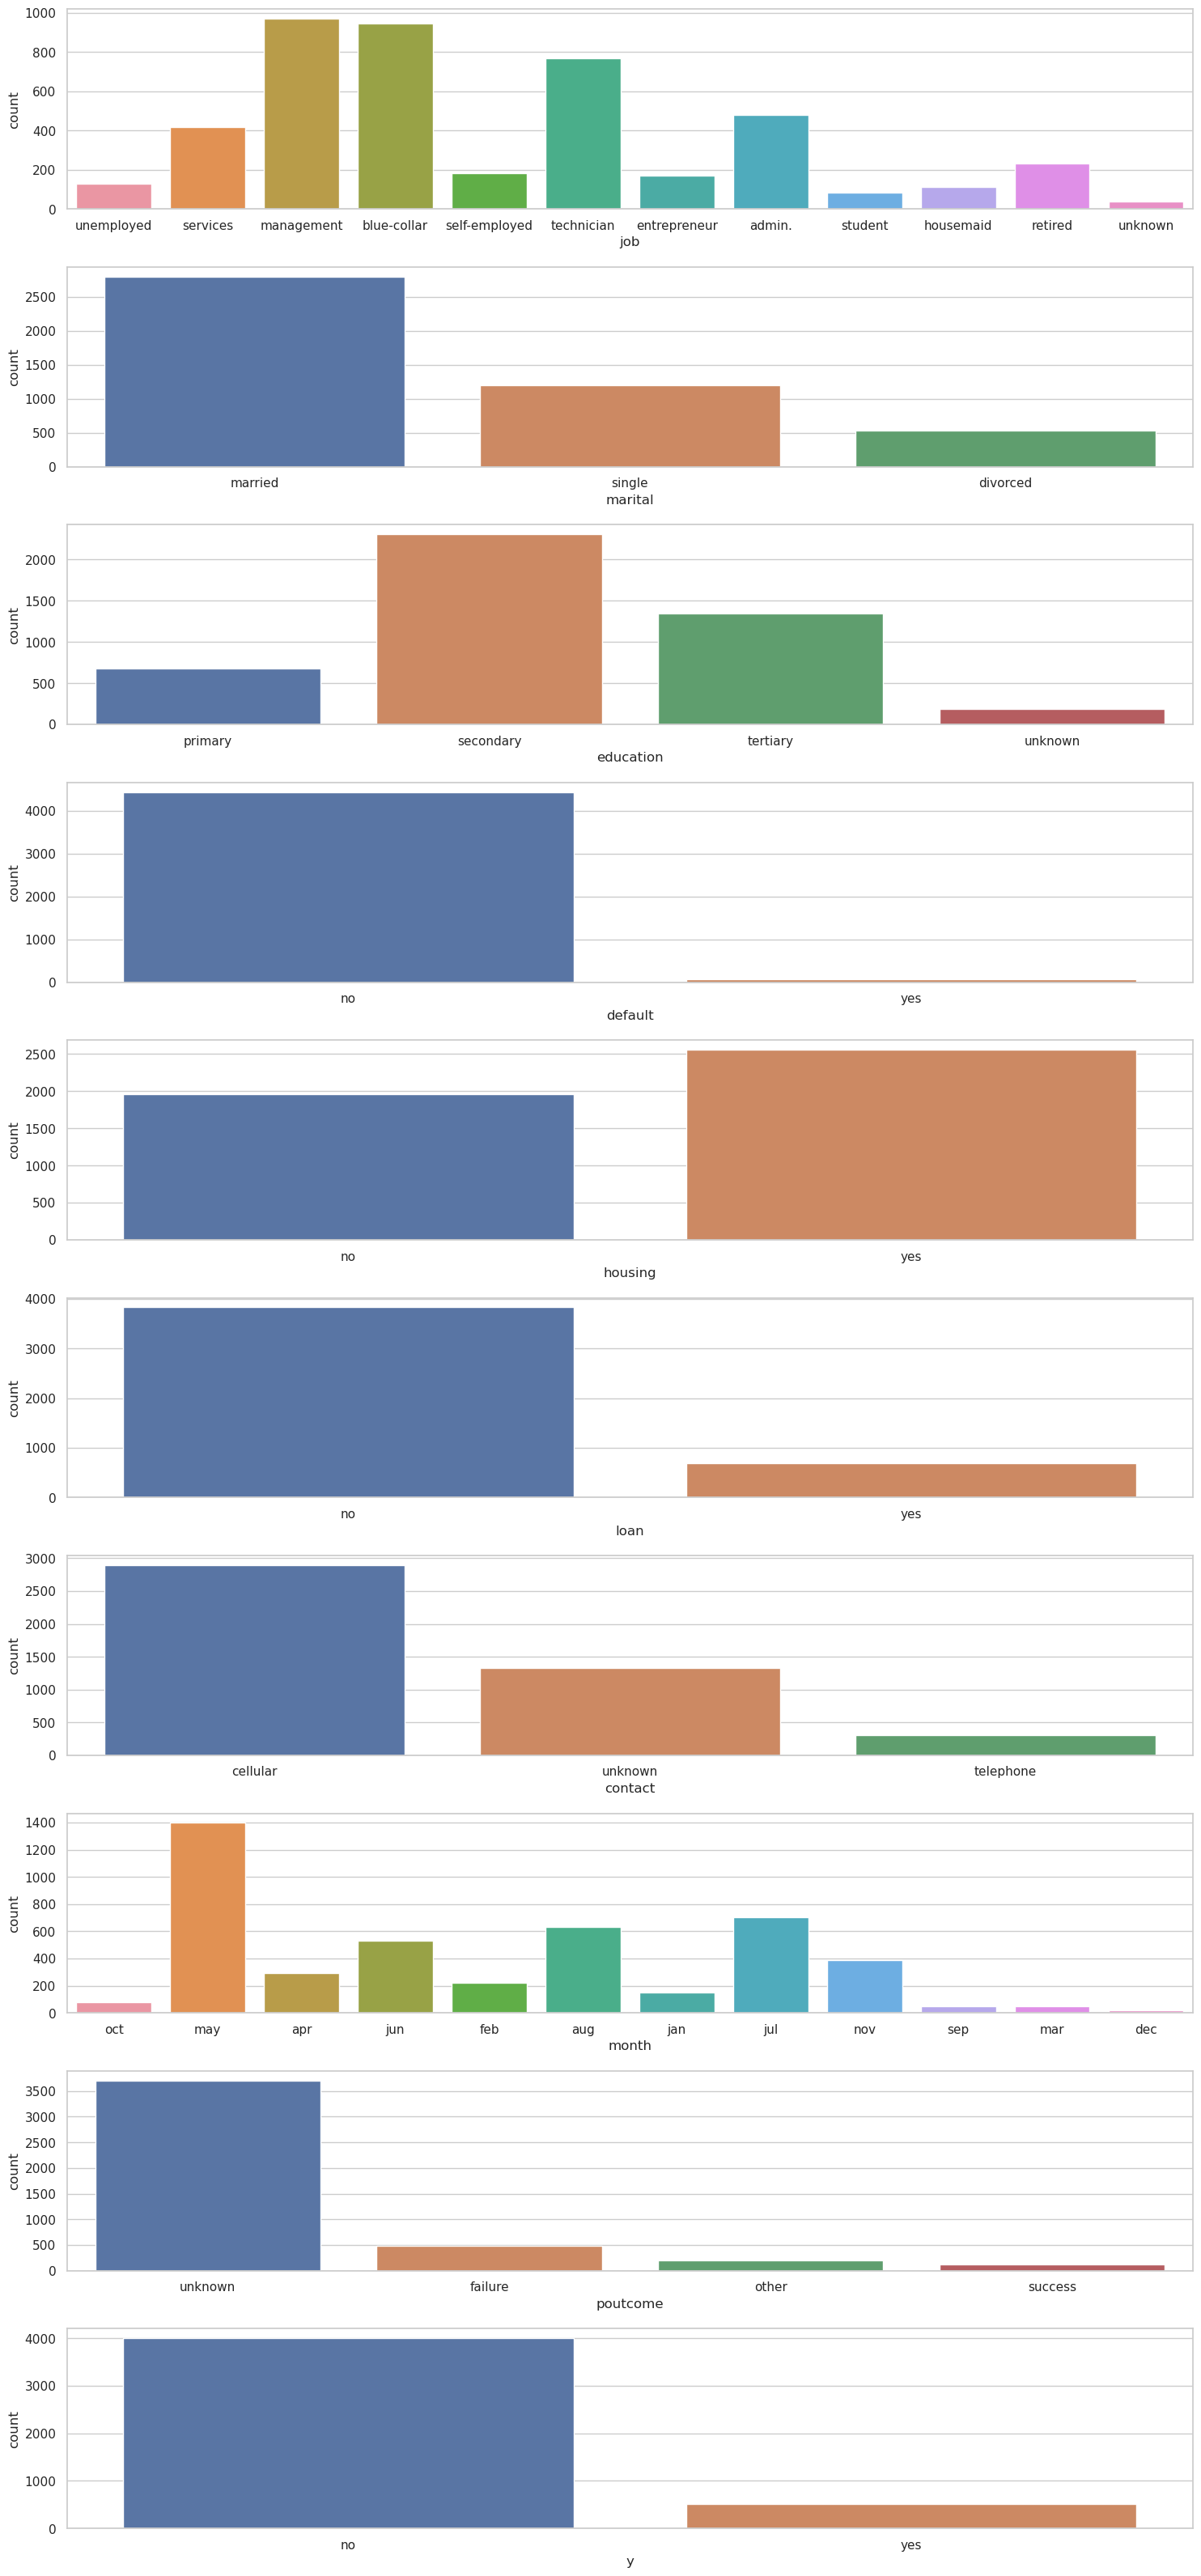

In [254]:
# Categorical features
cat_feats=[col for col in df.columns if df[col].dtypes == 'object']

# Plot distribution of categorical columns
fig=plt.figure(figsize=(15,32))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(len(cat_feats),1,i+1)
    sns.countplot(data=df, x=var_name, axes=ax)
 
fig.tight_layout() 
plt.show()



***Initial analysis of various categories features:***


* Most deposits were opened by administrative staff and technical specialists. In relative terms, a good number of retired persons and students also grab this.

* While married customers used the service more often in absolute terms, single customers responded better in relative terms.

* The preferred communication channel is secular.

* A notable difference exists between customers who already use bank services and have received a loan.

* Owning a home does not significantly impact the marketing company's performance.

* People who were contacted last time in March, December, September, and October convert much better than others.

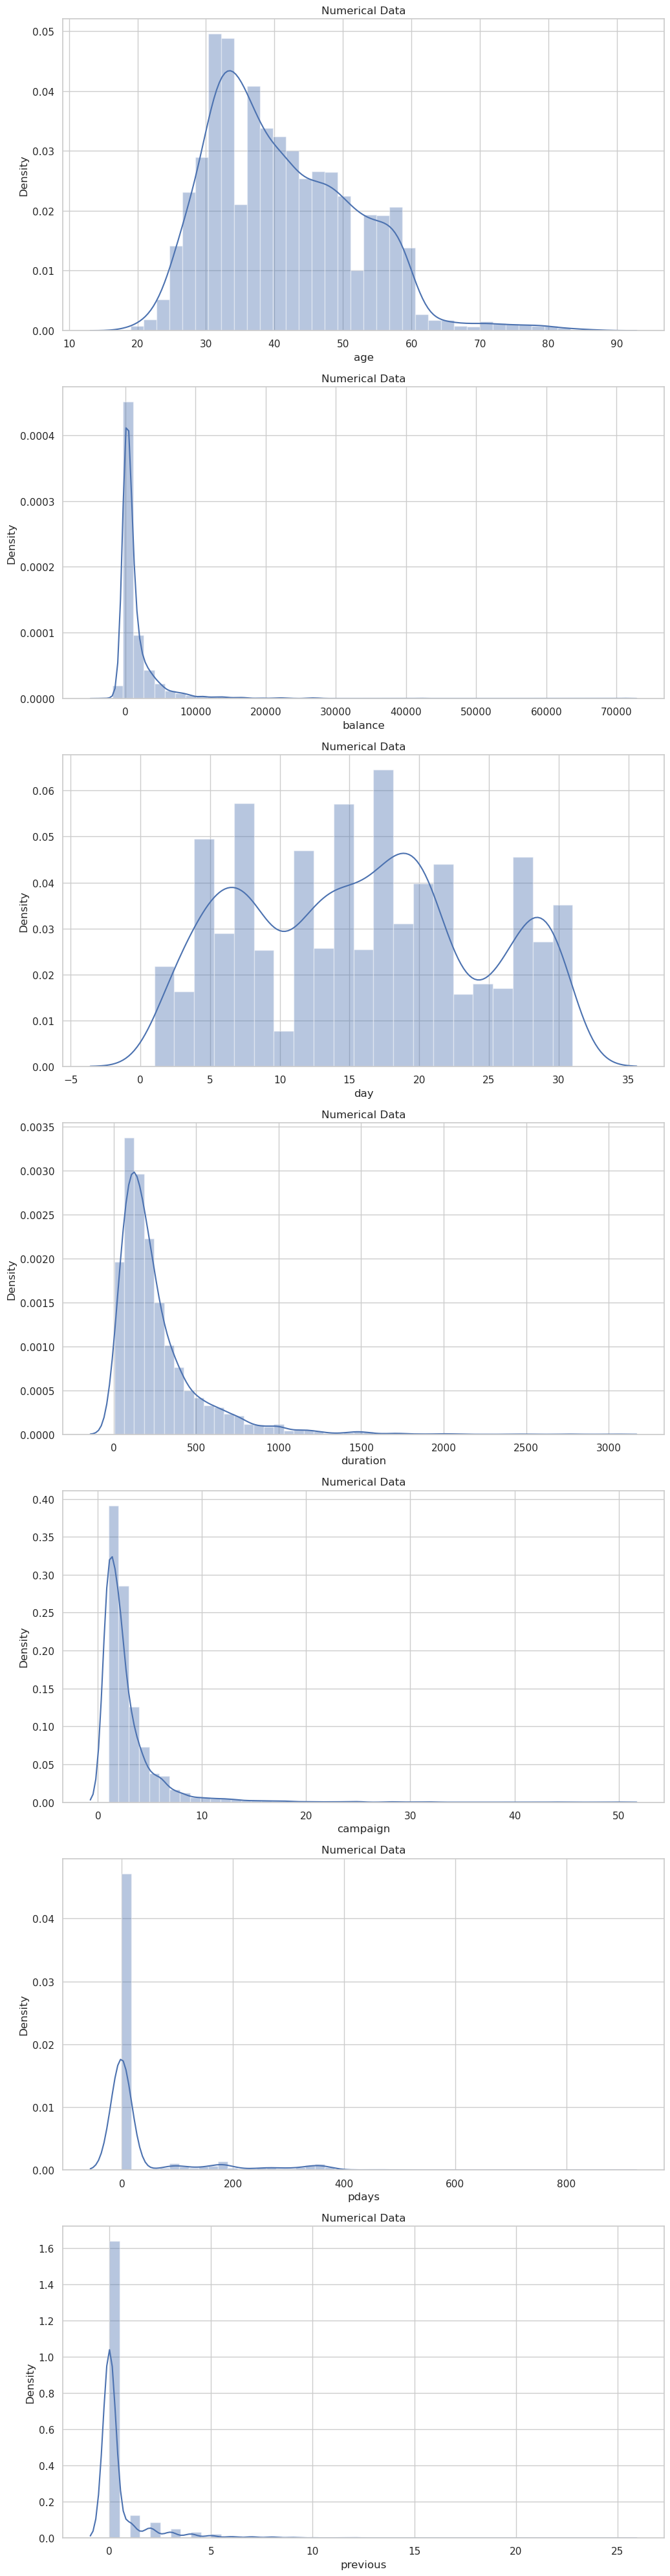

In [255]:
# Numerical features
num_feats=[col for col in df.columns if df[col].dtypes != 'object']

# Plot distribution of numerical columns
fig=plt.figure(figsize=(20,40))
for i, col in enumerate(num_feats):
    plt.subplot(len(num_feats),2,2*i+1)
    sns.distplot(df[col])
    plt.title(f'Numerical Data')
    
fig.tight_layout()
plt.show()

### Bivariate Analysis

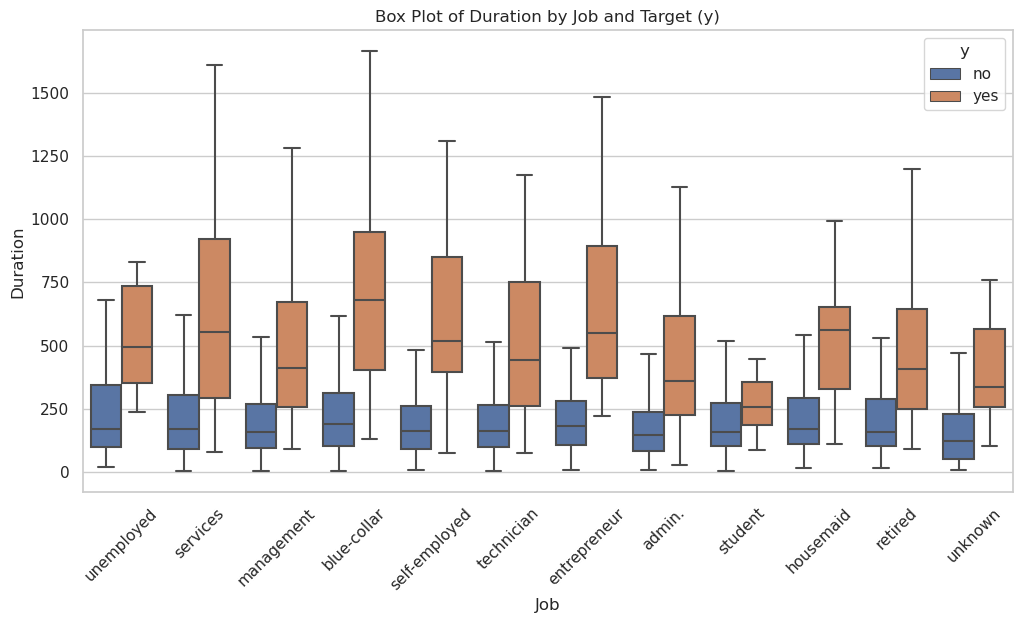

In [256]:
plt.figure(figsize=(12, 6))  
sns.boxplot(data=df, x="job", y="duration", hue="y", showfliers=False) 
plt.title("Box Plot of Duration by Job and Target (y)")
plt.xlabel("Job")
plt.ylabel("Duration")
plt.xticks(rotation=45)
plt.show()

* Leads no deposit less call time.
* Comparing, blue collar entrepreneurs long calls, students retired short calls.
* Many leads from self-employed and managers.

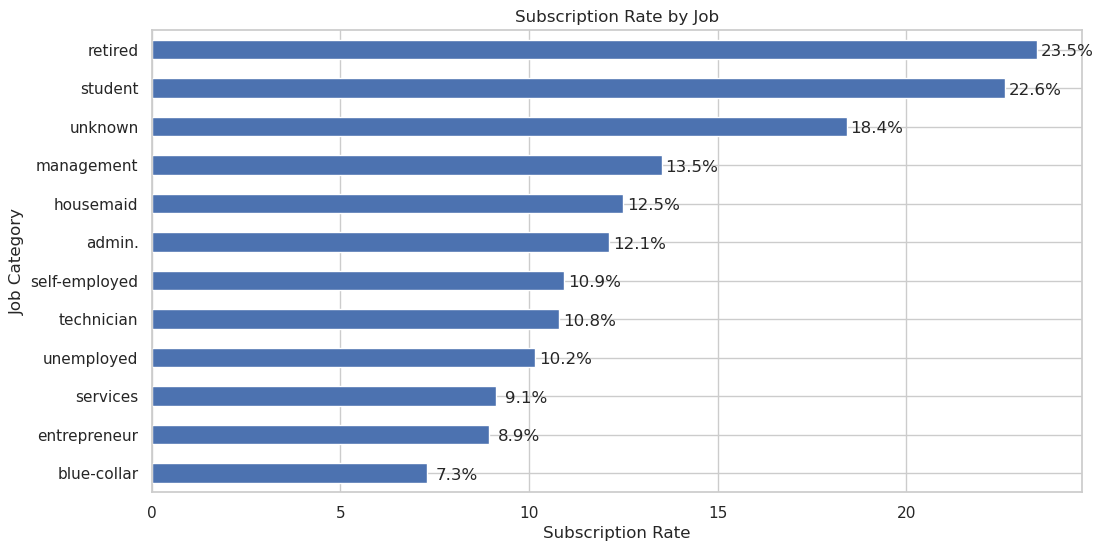

In [257]:
count_job_response_pct = pd.crosstab(df['y'],df['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()

plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

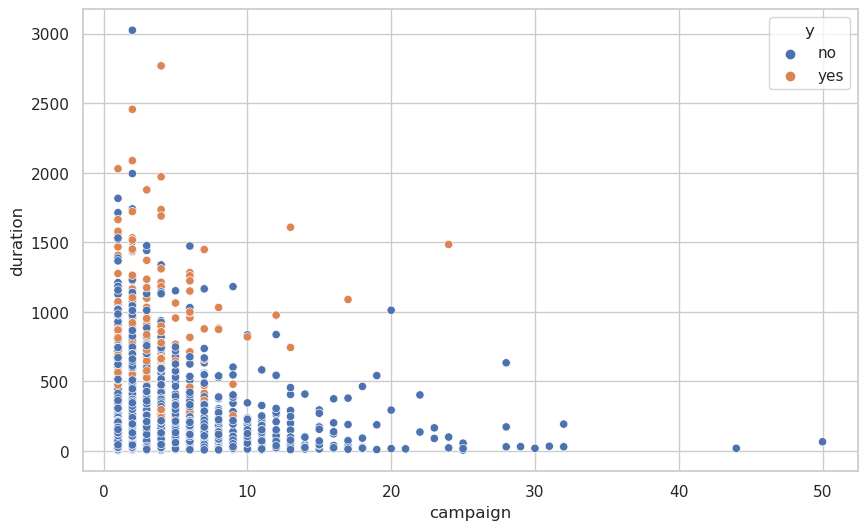

In [258]:
plt.figure(figsize=(10, 6))  
sns.scatterplot(data=df, x="campaign", y="duration", hue="y")
plt.show()

* More duration, higher probability for deposit.

* Call duration decreased as campaign time grew.

* Many good leads early in campaign.

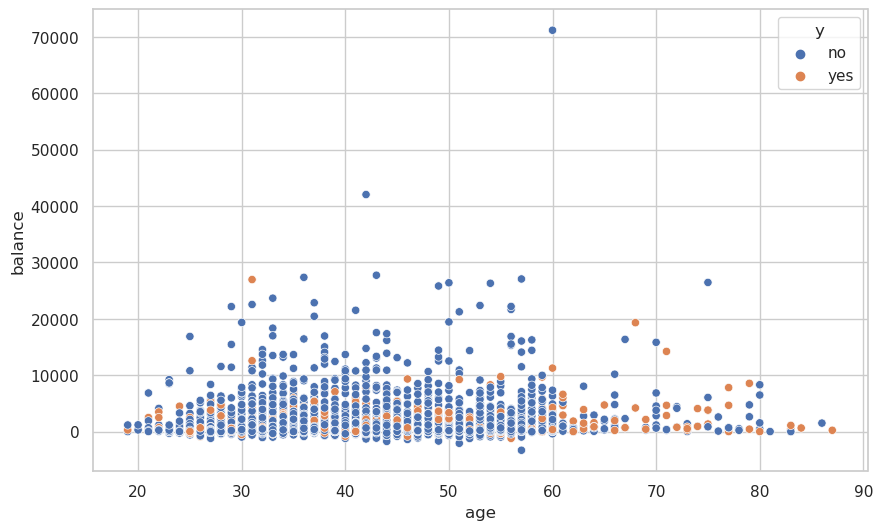

In [259]:
plt.figure(figsize=(10, 6))  
sns.scatterplot(data=df, x="age", y="balance", hue="y")
plt.show()

* More ages, higher probability for deposit

* Lower balance increases the leads

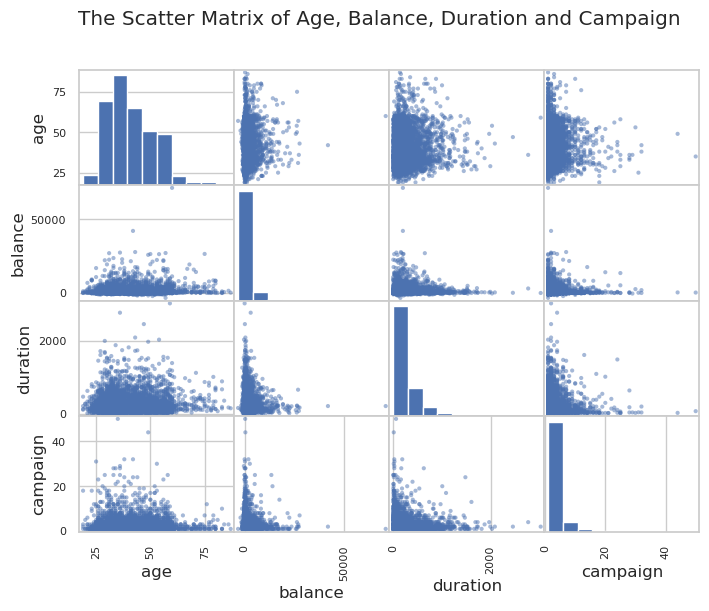

In [260]:
from pandas.plotting import scatter_matrix
matrix = scatter_matrix(df[['age','balance','duration','campaign']],figsize=(8,6))
plt.suptitle('The Scatter Matrix of Age, Balance, Duration and Campaign')
plt.show()

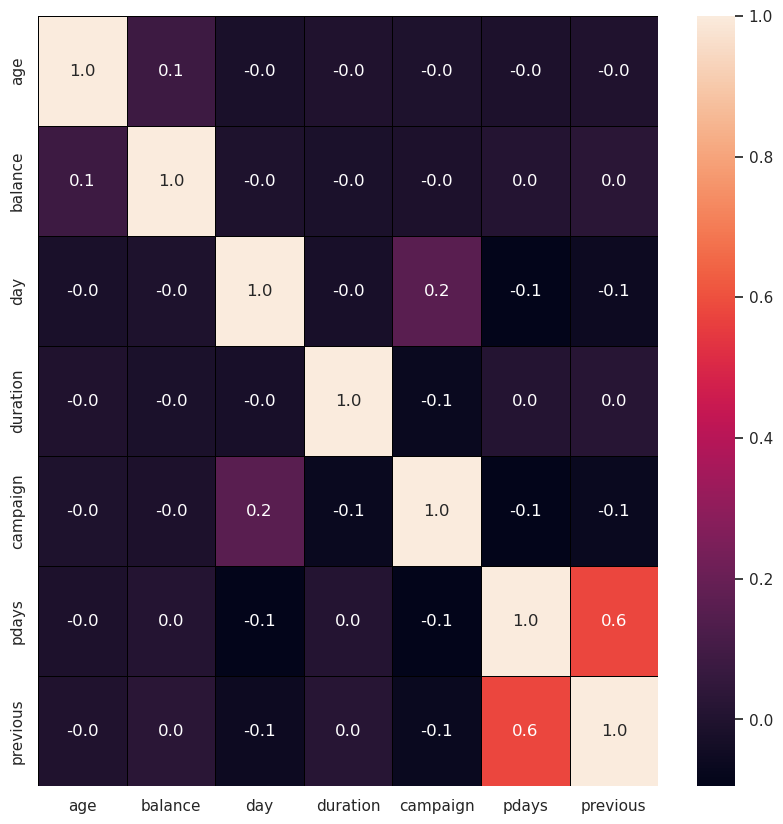

In [261]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.show()

# Data Cleaning & Feature Engineering


In [262]:
df['job'] = df[['job']].replace(['unknown'],'other')

In [263]:
df['poutcome'].value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

In [264]:
# Drop column "contact" which is useless
df = df.drop('contact', axis=1)

In [265]:
# Change the unit of 'duration' from seconds to minutes
df['duration'] = df['duration'].apply(lambda n:n/60).round(2)

In [266]:
# Label Encoding por month
monthEncoder = preprocessing.LabelEncoder()
df['month'] = monthEncoder.fit_transform(df['month'])

# Label Encoding por job
JobEncoder = preprocessing.LabelEncoder()
df['job'] = monthEncoder.fit_transform(df['job'])

In [267]:

df = df.drop(df[df['poutcome'] == 'other'].index, axis = 0, inplace =False)
df = df.drop(df[df['education'] == 'unknown'].index, axis = 0, inplace =False)

In [268]:
df['y'] = df['y'].apply(lambda x: 0 if x == 'no' else 1)
df['default'] = df['default'].apply(lambda x: 0 if x == 'no' else 1)
df['housing'] = df['housing'].apply(lambda x: 0 if x == 'no' else 1)
df['loan'] = df['loan'].apply(lambda x: 0 if x == 'no' else 1)
df['marital'] = df['marital'].map({'married': 1, 'single': 2, 'divorced': 3})
df['education'] = df['education'].map({'primary': 1, 'secondary': 2, 'tertiary': 3})
df['poutcome'] = df['poutcome'].map({'unknown': 1, 'failure': 2, 'success': 3})

In [269]:
feature_scale=[feature for feature in num_feats]
scaler=StandardScaler()
scale = scaler.fit_transform(df[feature_scale])
df[feature_scale] = scale

In [270]:
feature_scale

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [271]:
X = df.drop('y', axis=1)
Y = df['y']

In [272]:
Y 

0       0
1       0
2       0
3       0
4       0
       ..
4514    0
4515    0
4516    0
4517    0
4518    0
Name: y, Length: 4145, dtype: int64

In [273]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.20, random_state=7)

# Classification

## DecisionTree

In [274]:
clf_tree = DecisionTreeClassifier(criterion='entropy',
                                  max_depth=2)
clf_tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [275]:
# Prediction 
TreePredictions = clf_tree.predict(X_test)
# Accuracy Score 
print(accuracy_score(Y_test, TreePredictions))

0.8902291917973462


In [276]:
# Classification Report
print(classification_report(Y_test, TreePredictions))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       729
           1       0.55      0.48      0.51       100

    accuracy                           0.89       829
   macro avg       0.74      0.71      0.73       829
weighted avg       0.88      0.89      0.89       829



In [277]:
# import pickle
# pickle.dump(clf_tree, open('model.pkl', 'wb'))

## Naive Bayes

In [278]:
clf_nb = GaussianNB()
clf_nb.fit(X_train, Y_train)

GaussianNB()

In [279]:
NbPredictions = clf_nb.predict(X_test)
# Accuracy Score 
print(accuracy_score(Y_test, NbPredictions))

0.8576598311218335


In [280]:
# Classification Report
print(classification_report(Y_test, NbPredictions))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       729
           1       0.42      0.49      0.45       100

    accuracy                           0.86       829
   macro avg       0.68      0.70      0.69       829
weighted avg       0.87      0.86      0.86       829



In [281]:
# import pickle
# pickle.dump(clf_nb, open('model.pkl', 'wb'))

## Compare Two Models:

Comparison:

* The Decision Tree classifier outperformed the Naive Bayes classifier in terms of both accuracy and F1 score. It achieved an accuracy of 89% compared to Naive Bayes' 85%, indicating that Decision Tree made more correct predictions overall.

* Similarly, the F1 score for the Decision Tree was 89%, while Naive Bayes had an F1 score of 86%. The higher F1 score for the Decision Tree suggests that it struck a better balance between precision and recall, making it a more suitable choice when considering both false positives and false negatives.

* It's worth noting that the Decision Tree's performance indicates that it may have captured more complex relationships in the data, which can be beneficial in cases where the classification task requires nuanced decision boundaries. However, Decision Trees can also be prone to overfitting, so it's essential to evaluate their robustness and generalization performance on additional data.

In summary, the Decision Tree classifier appears to be the more effective choice for this specific classification problem, as it provides higher accuracy and a better F1 score compared to the Naive Bayes classifier. Nevertheless, it's advisable to further evaluate the models and consider potential overfitting or other factors that might affect their performance on new data.


## Conclusion:

The primary aim of this project is to enhance the bank's telemarketing campaign's effectiveness. This was achieved through data analysis, visualization, and the development of analytical models. We established a target customer profile and crafted classification and regression models to predict customer responses to the term deposit campaign.

In conclusion, our analysis enabled the creation of a target customer profile. The most responsive customers exhibit the following characteristics:

* Customers aged below 30 or over 60.
* Students or retirees.

We successfully constructed classification and estimation models using logistic and ridge regression algorithms. With these models in place, the bank can forecast customer responses to its telemarketing campaign before making calls. Consequently, the bank can focus more marketing efforts on customers highly likely to accept term deposits and reduce outreach to those less likely to do so.

Furthermore, the ability to predict the call duration and adjust the marketing plan benefits both the bank and its clients. On one hand, it enhances the efficiency of the bank's telemarketing campaign, saving time and resources. On the other hand, it prevents certain clients from receiving unwanted advertisements, leading to increased customer satisfaction. With the assistance of logistic and ridge regression models, the bank can initiate a positive cycle of effective marketing, increased investments, and happier customers.

## Recommendations:

* Timing Optimization

When implementing a marketing strategy, it's crucial to consider external factors, such as the timing of outreach. The analysis has shown that March, September, October, and December yielded the highest success rates. However, it's advisable to gather more data and conduct ongoing analysis to ensure that this seasonal pattern remains consistent. If the trend appears likely to persist, the bank should consider launching its telemarketing campaigns during the autumn and spring seasons.

* Enhanced Marketing Strategy

By focusing on the right target audience, the bank can increase positive responses and gradually address the imbalance in the initial dataset using classification algorithms. Consequently, the bank will gain more precise insights for improving subscription rates. Furthermore, the bank should reassess the content and design of its current campaign to make it more enticing to its intended audience, thereby increasing the likelihood of successful subscriptions.

* Improved Service Delivery

With a more detailed understanding of its customer base, the bank can enhance its banking services. For instance, marital status and occupation can provide insights into a customer's life stage, while loan status can indicate their overall risk profile. Armed with this information, the bank can anticipate when a customer may require specific financial products or services. This approach allows the bank to better meet customer demands by providing the right banking services to the right customers at the right time.